# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
pip install optuna

     |████████████████████████████████| 308 kB 5.3 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 210 kB 50.0 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 113 kB 50.3 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 146 kB 48.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=3a54a697a87f9da3811250f455bd237ad4076f96f2c8d23f9b161f6764e8a323
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# Importing Dataset

In [ ]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# EDA on Dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [ ]:
df.replace({'?': np.NAN},inplace=True)

In [ ]:
print(df.isnull().mean()*100)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
for i in df.columns:
    print(" unique values in {} column are-- {}.".format(i, df[i].nunique()))

 unique values in encounter_id column are-- 101766.
 unique values in patient_nbr column are-- 71518.
 unique values in race column are-- 5.
 unique values in gender column are-- 3.
 unique values in age column are-- 10.
 unique values in weight column are-- 9.
 unique values in admission_type_id column are-- 8.
 unique values in discharge_disposition_id column are-- 26.
 unique values in admission_source_id column are-- 17.
 unique values in time_in_hospital column are-- 14.
 unique values in payer_code column are-- 17.
 unique values in medical_specialty column are-- 72.
 unique values in num_lab_procedures column are-- 118.
 unique values in num_procedures column are-- 7.
 unique values in num_medications column are-- 75.
 unique values in number_outpatient column are-- 39.
 unique values in number_emergency column are-- 33.
 unique values in number_inpatient column are-- 21.
 unique values in diag_1 column are-- 716.
 unique values in diag_2 column are-- 748.
 unique values in diag

In [ ]:
df.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [ ]:
df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
df['readmitted'] = df['readmitted'].replace({'>30':1,'<30':1,'NO':0})

In [ ]:
df['readmitted'].head()

0    0
1    1
2    0
3    0
4    0
Name: readmitted, dtype: int64

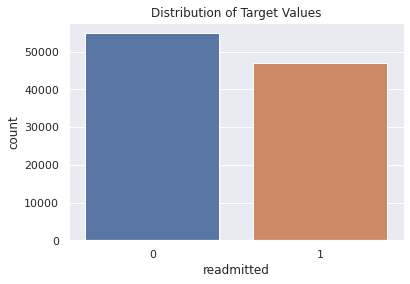

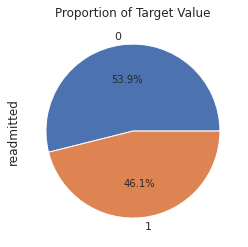

In [ ]:
sns.countplot(x = "readmitted", data = df)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
df.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

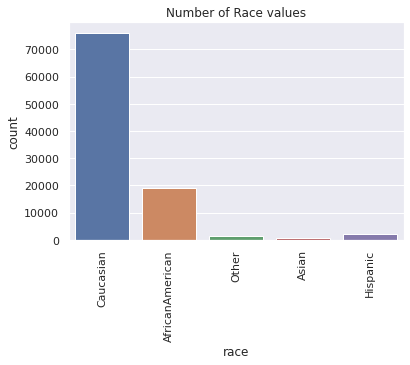

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [ ]:
sns.countplot(x=df.race, data = df)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(df.race.value_counts(normalize = True)*100)

As we see, there is Caucasians in 76 percent of all our data. And other other 24 percent is divided into African Americans, Hispanics, Asians and Others.
Here we decided to divide into 3 groups like Caucasian, African American and Other.

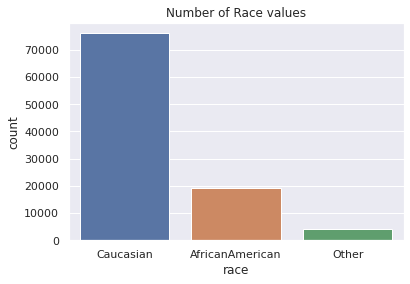

Proportion of Race After the Mapping
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: race, dtype: float64


In [ ]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
df.race = df.race.replace(mapped_race)

sns.countplot(x="race", data = df)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(df.race.value_counts(normalize= True)*100)


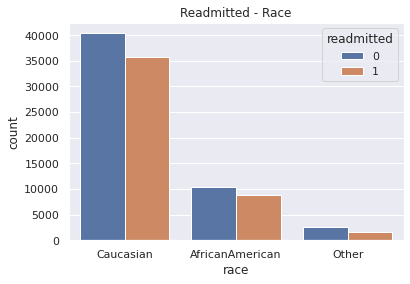

In [ ]:
sns.countplot(x="race", hue= "readmitted", data = df)
plt.title("Readmitted - Race")
plt.show()

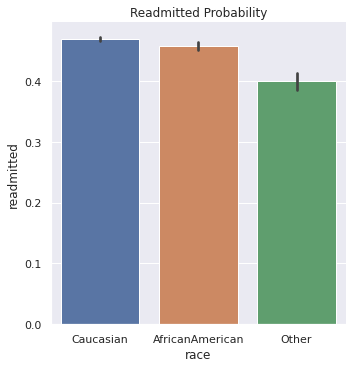

In [ ]:
sns.catplot(x = "race", y = "readmitted",
            data = df, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

Most of the patients are Caucasian, followed by African Americans.
Although the Other values are few than Caucasian, we see that the Readmitted Probability almost close to Caucasian.

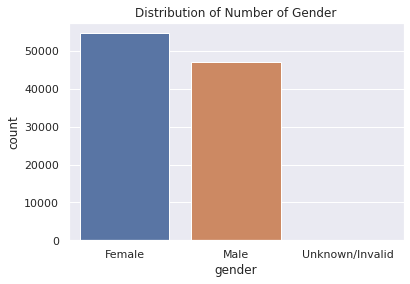

Proportions of Race Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


In [ ]:
sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(df.gender.value_counts(normalize = True))

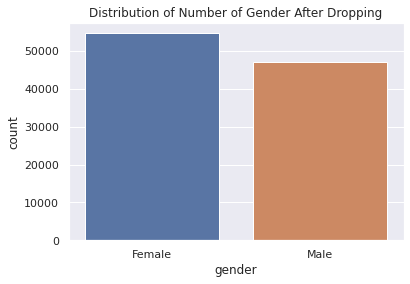

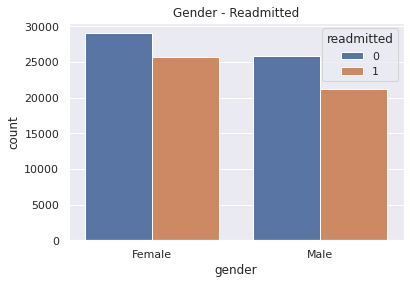

In [ ]:
df = df.drop(df.loc[df["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = df)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = df)
plt.title("Gender - Readmitted")
plt.show()

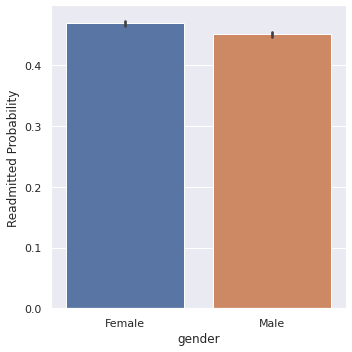

In [ ]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = df, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

We see a nearly equal distribution of Gender.
Also, we can state that Females are a little more prone than Males.

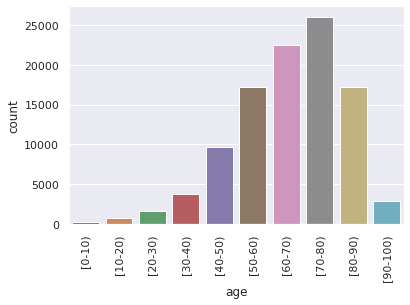

In [ ]:
sns.countplot(x="age", data = df)
plt.xticks(rotation = 90)
plt.show()

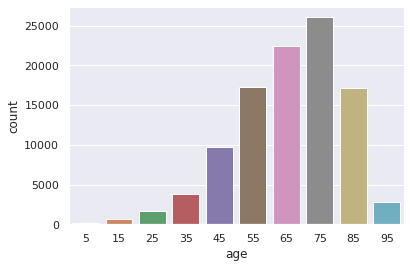

In [ ]:
df.age = df.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = df)
plt.show()

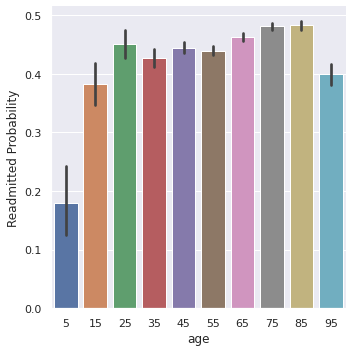

Proportions of Age
75    25.614418
65    22.092509
55    16.957047
85    16.899069
45     9.517212
35     3.709600
95     2.744612
25     1.628293
15     0.679029
5      0.158211
Name: age, dtype: float64


In [ ]:
g = sns.catplot(x = "age", y = "readmitted", data = df, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

print("Proportions of Age")
print(df.age.value_counts(normalize=True)*100)

 we have an elderly population

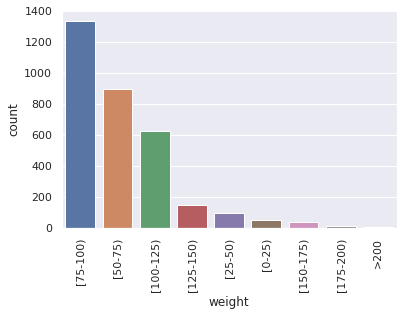

In [ ]:
sns.countplot(x = "weight", data = df,
            order = df.weight.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

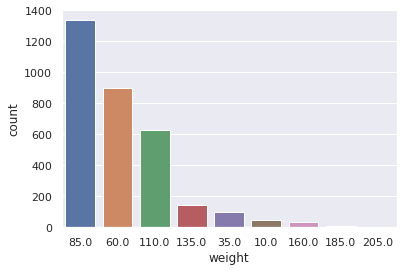

Proportions of Weights
85.0     41.789177
60.0     28.057554
110.0    19.549578
135.0     4.535502
35.0      3.034094
10.0      1.501408
160.0     1.094776
185.0     0.344073
205.0     0.093838
Name: weight, dtype: float64


In [ ]:
df["weight"]=df["weight"].replace({"[75-100)":85,
                             "[50-75)":60,
                             "[100-125)":110,
                             "[125-150)":135,
                             "[25-50)":35,
                             "[0-25)":10,
                             "[150-175)":160,
                             "[175-200)":185,
                             ">200":205})

sns.countplot(x = "weight", data = df,
            order = df.weight.value_counts().index)
plt.show()

print("Proportions of Weights")
print(df.weight.value_counts(normalize=True)*100)

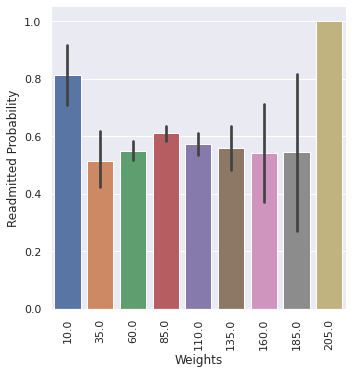

In [ ]:
g = sns.catplot(x = "weight", y = "readmitted",
                kind = "bar", data = df, height = 5)
g.set_xticklabels(rotation = 90)
g.set_ylabels("Readmitted Probability")
g.set_xlabels("Weights")
plt.show()

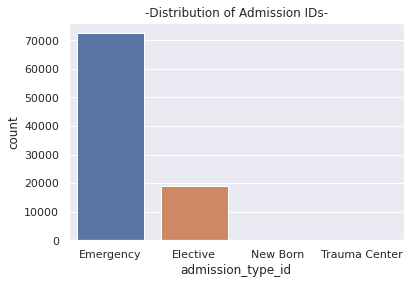

-Distribution of ID's-
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [ ]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

df.admission_type_id = df.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = df)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(df.admission_type_id.value_counts())

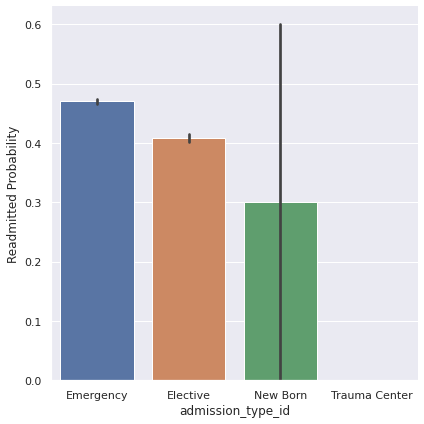

In [ ]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = df, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

In [ ]:
df["discharge_disposition_id"].value_counts()
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",12:"Other", 11:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(mapped_discharge)

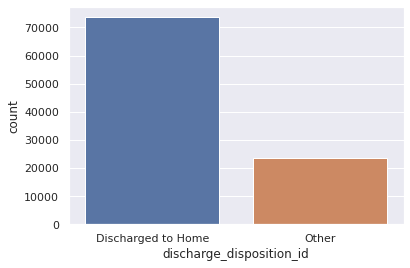

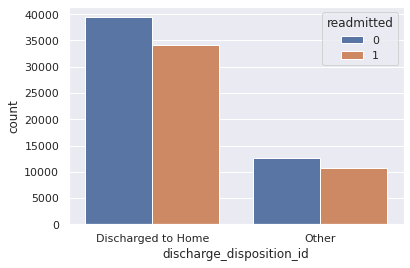

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


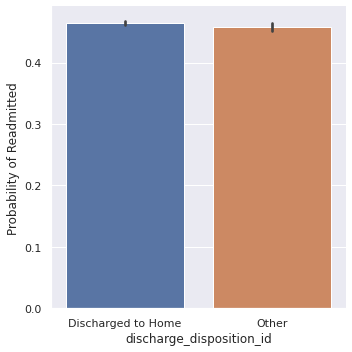

In [ ]:
sns.countplot(x ="discharge_disposition_id", data = df)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = df)
plt.show()

print("Proportions of ID's")
print(df.discharge_disposition_id.value_counts())

g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = df, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

If any one includes "home" word I will grouping into one
If not, it will be as OTHER
NAN = 18, 25, 26

Admission source physician referral, emergency room, and transfer from a hospital

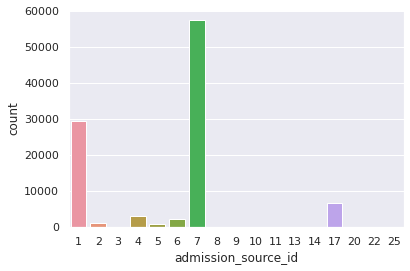

In [ ]:
sns.countplot(x ="admission_source_id", data = df)
plt.show()

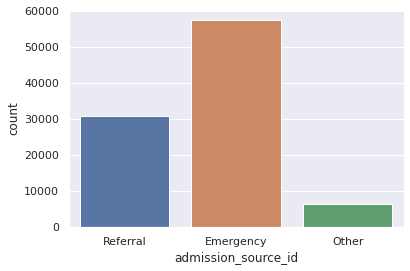

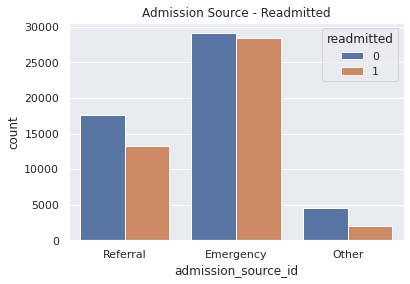

Emergency    57492
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64


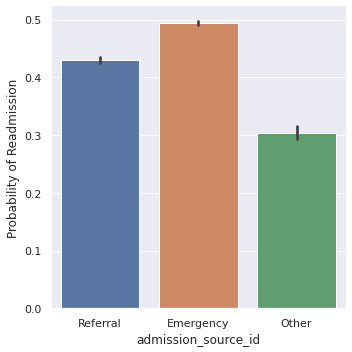

In [ ]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
df.admission_source_id = df.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = df)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = df)
plt.title("Admission Source - Readmitted")
plt.show()


print(df.admission_source_id.value_counts())

g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = df, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

We see that Readmitted Probability of Referral is very close to Emergency, although Emergency is have more samples than other

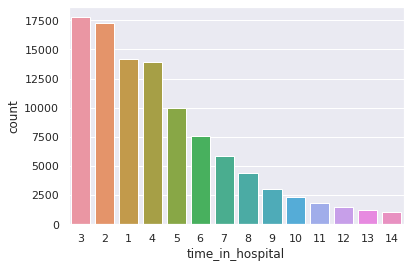

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


In [ ]:
sns.countplot(x="time_in_hospital", data = df,
              order = df.time_in_hospital.value_counts().index)
plt.show()

print(df.time_in_hospital.value_counts())

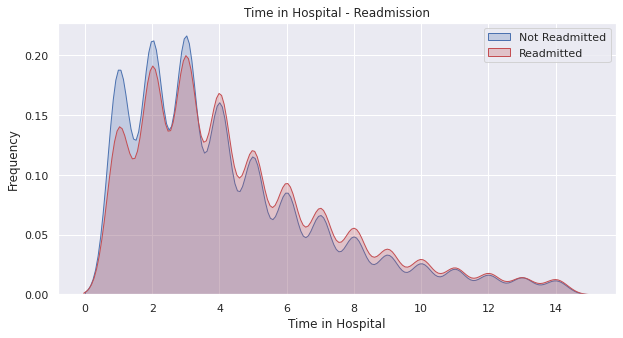

In [ ]:

fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(df.loc[(df.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

Most of people stayed 2 - 3 days in hospital

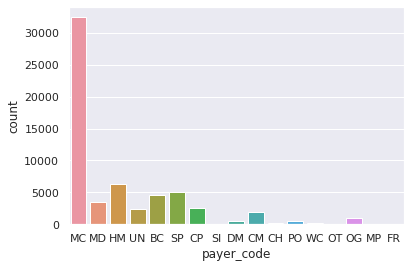

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2531
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64


In [ ]:
sns.countplot(x = "payer_code", data = df)
plt.show()

print(df.payer_code.value_counts())


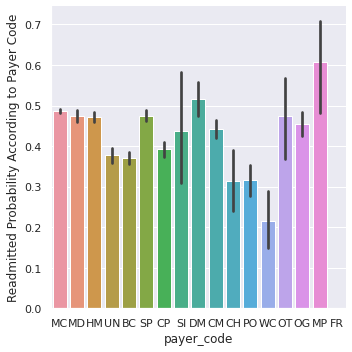

In [ ]:
sns.catplot(x = "payer_code", y = "readmitted",
               data = df, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability According to Payer Code")
plt.show()

In [ ]:
print(df.medical_specialty.value_counts())
print(df.medical_specialty.nunique())

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5351
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 72, dtype: int64
72


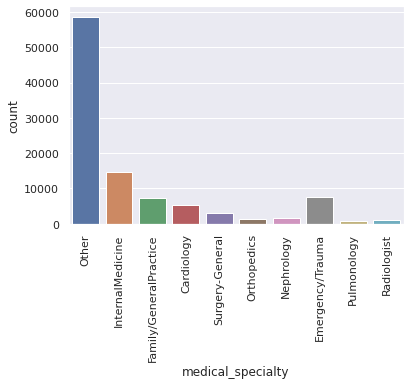

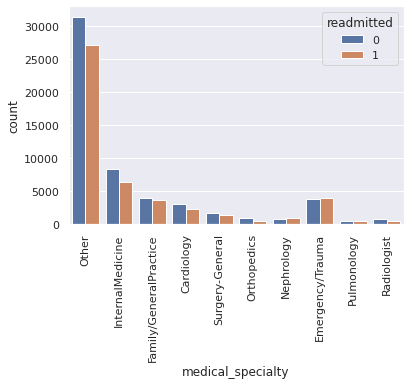

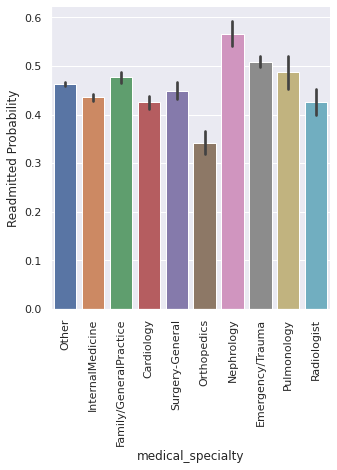

In [ ]:
top_10=['InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General',
        "Nephrology","Orthopedics","Radiologist","Pulmonology"]

df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'



sns.countplot(x = "medical_specialty", data = df)
plt.xticks(rotation = 90)
plt.show()

sns.countplot(x = "medical_specialty",hue = "readmitted", data = df)
plt.xticks(rotation = 90)
plt.show()

sns.catplot(x = "medical_specialty", y = "readmitted",
               data = df, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability")
plt.xticks(rotation = 90)
plt.show()


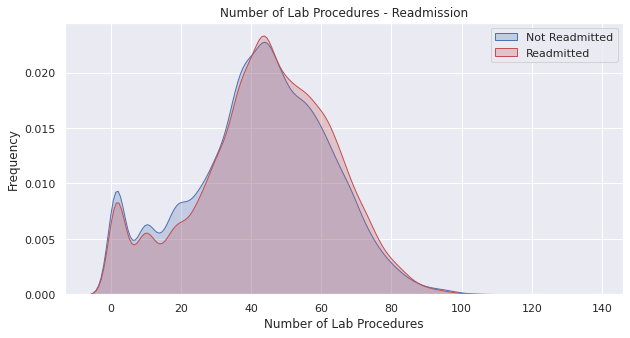

In [ ]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(df.loc[(df.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(df.loc[(df.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

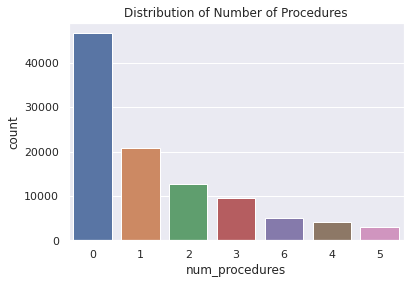

Proportions of Values
0    45.843774
1    20.381671
2    12.495701
3     9.279404
6     4.868174
4     4.107583
5     3.023692
Name: num_procedures, dtype: float64


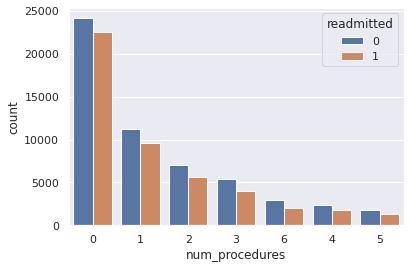

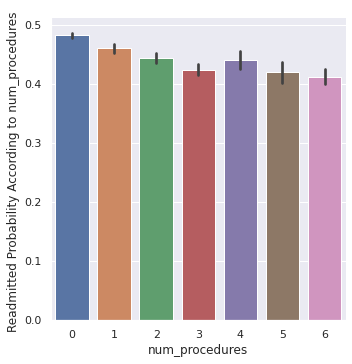

In [ ]:
sns.countplot(x = df.num_procedures, order = df.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(df.num_procedures.value_counts(normalize=True)*100)

sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = df, order = df.num_procedures.value_counts().index)
plt.show()

sns.catplot(x = "num_procedures", y = "readmitted",
               data = df, kind = "bar", height = 5)
plt.ylabel("Readmitted Probability According to num_procedures ")
plt.show()

In [ ]:
print(df.value_counts())
print(df.medical_specialty.nunique())

encounter_id  patient_nbr  race             gender  age  weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
88754226      78163290     Caucasian        Male    45   85.0    Elective           Discharged to Home        Referral             1                 WC          Other              28                  2               15               0                  0                 0  

In [ ]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [ ]:
diabet = map_diagnosis(df,["diag_1","diag_2","diag_3"])

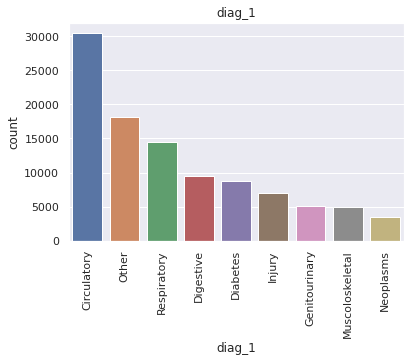

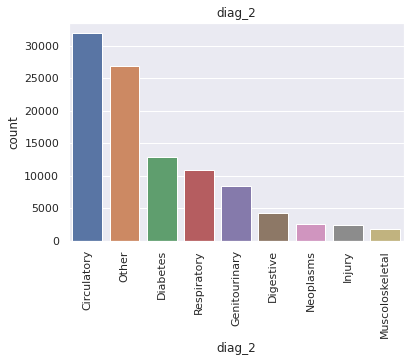

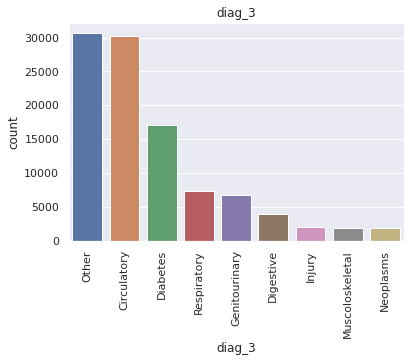

In [ ]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabet)

Diabetes medications
There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.

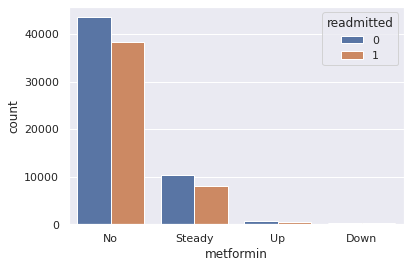

METFORMIN
No        81776
Steady    18345
Up         1067
Down        575
Name: metformin, dtype: int64


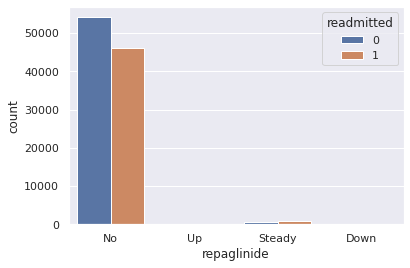

REPAGLINIDE
No        100224
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


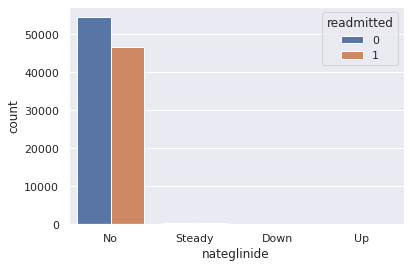

NATEGLINIDE
No        101060
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


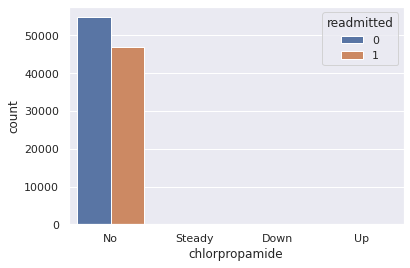

CHLORPROPAMIDE
No        101677
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


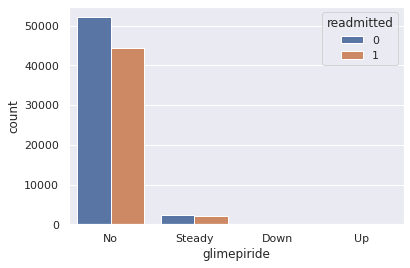

GLIMEPIRIDE
No        96572
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


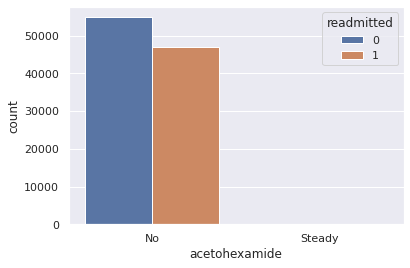

ACETOHEXAMIDE
No        101762
Steady         1
Name: acetohexamide, dtype: int64


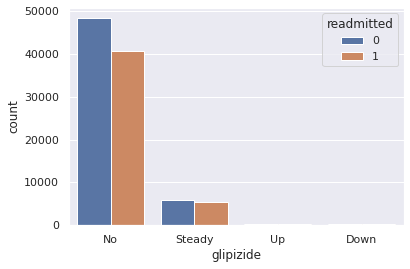

GLIPIZIDE
No        89078
Steady    11355
Up          770
Down        560
Name: glipizide, dtype: int64


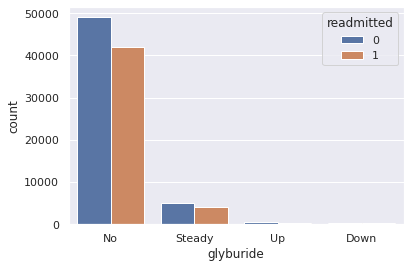

GLYBURIDE
No        91113
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


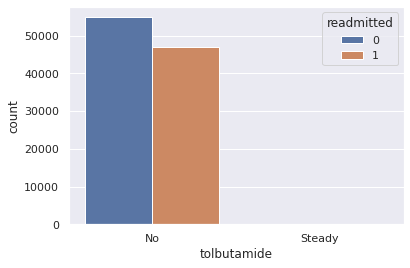

TOLBUTAMIDE
No        101740
Steady        23
Name: tolbutamide, dtype: int64


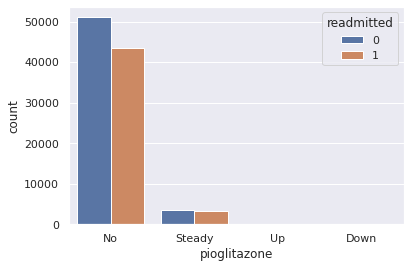

PIOGLITAZONE
No        94436
Steady     6975
Up          234
Down        118
Name: pioglitazone, dtype: int64


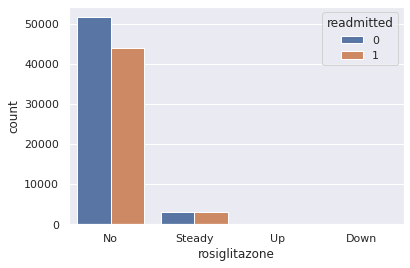

ROSIGLITAZONE
No        95399
Steady     6099
Up          178
Down         87
Name: rosiglitazone, dtype: int64


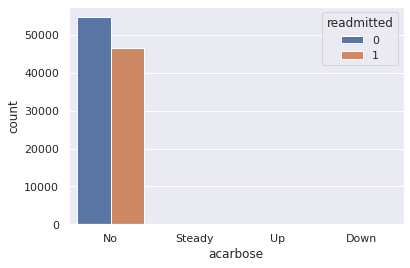

ACARBOSE
No        101455
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


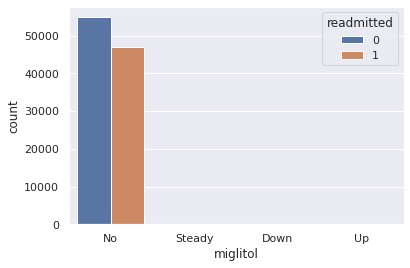

MIGLITOL
No        101725
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


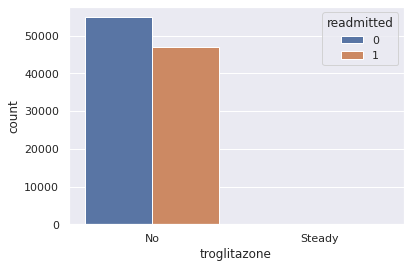

TROGLITAZONE
No        101760
Steady         3
Name: troglitazone, dtype: int64


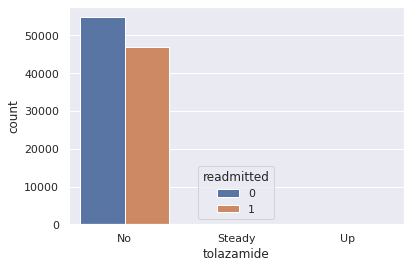

TOLAZAMIDE
No        101724
Steady        38
Up             1
Name: tolazamide, dtype: int64


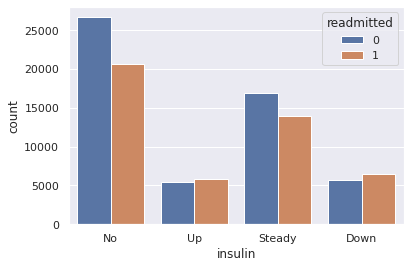

INSULIN
No        47380
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


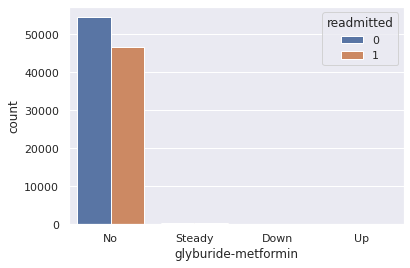

GLYBURIDE-METFORMIN
No        101057
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


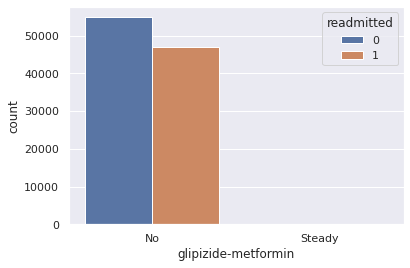

GLIPIZIDE-METFORMIN
No        101750
Steady        13
Name: glipizide-metformin, dtype: int64


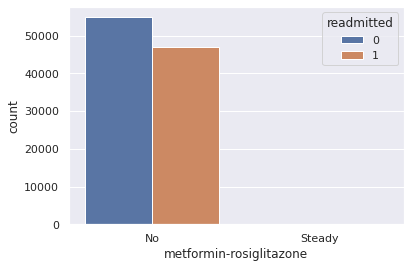

METFORMIN-ROSIGLITAZONE
No        101761
Steady         2
Name: metformin-rosiglitazone, dtype: int64


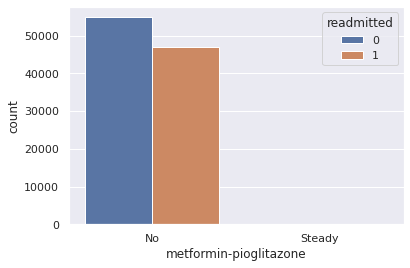

METFORMIN-PIOGLITAZONE
No        101762
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [ ]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = df)
    plt.show()
    print(drug.upper())
    print(diabet[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

No    54754
Ch    47009
Name: change, dtype: int64


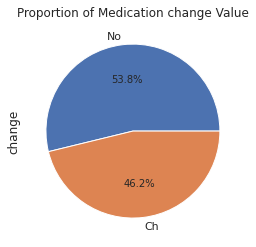

In [ ]:
print(df.change.value_counts())
# Pie chart
df.change.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Medication change Value")
plt.show()

In [ ]:
df.change = df.change.replace("Ch","Yes")

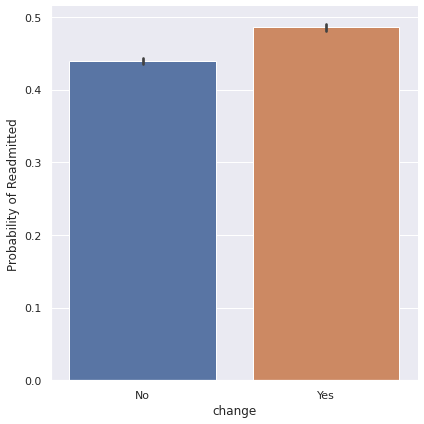

In [ ]:
g = sns.catplot(x = "change", y="readmitted", data = df, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

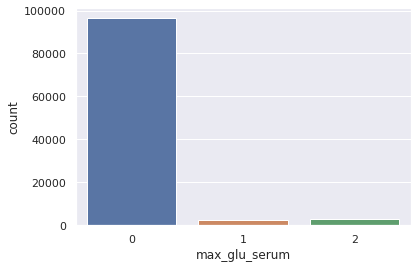

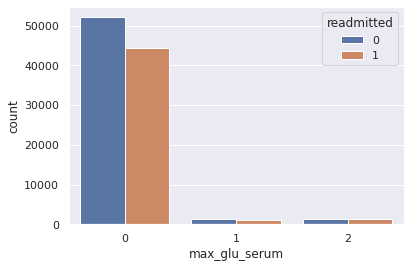

0    96417
2     2749
1     2597
Name: max_glu_serum, dtype: int64


In [ ]:
df["max_glu_serum"] = df["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

sns.countplot(x = "max_glu_serum", data = df)
plt.show()

sns.countplot(x = "max_glu_serum",hue = "readmitted", data = df)
plt.show()

print(df.max_glu_serum.value_counts())

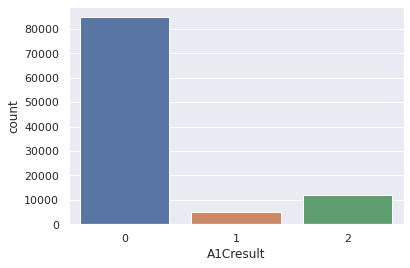

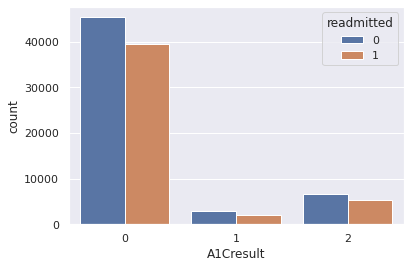

0    84745
2    12028
1     4990
Name: A1Cresult, dtype: int64


In [ ]:
df["A1Cresult"] = df["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = df)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = df)
plt.show()

print(df.A1Cresult.value_counts())

Diabetes medications
Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”


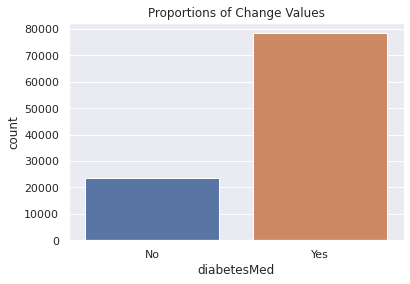

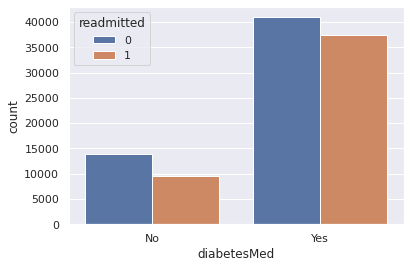

Yes    78361
No     23402
Name: diabetesMed, dtype: int64


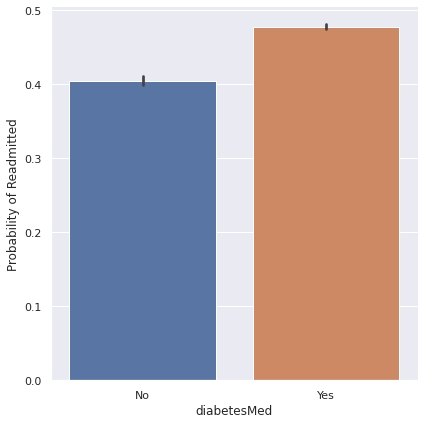

In [ ]:
sns.countplot(x = "diabetesMed", data = df )
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "diabetesMed", hue = "readmitted", data = df)
plt.show()

print(df.diabetesMed.value_counts())


g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = df, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

In [ ]:
df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                           int64
weight                      float64
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                      float16
diag_3                      float16
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [ ]:
# convert data type of nominal features in dataframe to 'object' type
i = ['encounter_id', 'diag_2','diag_3','patient_nbr', 'A1Cresult','change','diabetesMed', 'max_glu_serum']

df[i] = df[i].astype('object')

df.dtypes

encounter_id                 object
patient_nbr                  object
race                         object
gender                       object
age                           int64
weight                      float64
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [ ]:
df.describe()

,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,101763.000000,3197.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,65.966854,83.775414,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649,0.460894
std,15.941022,26.066313,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578,0.498471
min,5.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,55.000000,60.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,65.000000,85.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,75.000000,110.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,95.000000,205.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


In [ ]:
# get list of only numeric features
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
num_col

['num_lab_procedures',
 'number_inpatient',
 'time_in_hospital',
 'num_procedures',
 'weight',
 'number_diagnoses',
 'number_outpatient',
 'number_emergency',
 'age',
 'num_medications']

## Handling non-linearity and Skewness in Data

In [ ]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)
            
            kurtvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log(pd.DataFrame(df[train_data[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)
        
            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)
            
            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [ ]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,num_lab_procedures,-0.236531,-0.245042,19.674220,No,NA,-0.236531,-0.245042,19.674220
1,number_inpatient,3.614085,20.718836,1.262877,Yes,log1p,1.441917,1.375074,0.511106
2,time_in_hospital,1.134030,0.850342,2.985092,No,NA,1.134030,0.850342,2.985092
3,num_procedures,1.316460,0.857272,1.705792,No,NA,1.316460,0.857272,1.705792
4,weight,0.361212,1.435216,26.066313,No,NA,0.361212,1.435216,26.066313
5,number_diagnoses,-0.876799,-0.078883,1.933578,No,NA,-0.876799,-0.078883,1.933578
6,number_outpatient,8.832837,147.903740,1.267282,Yes,log1p,2.739686,7.851674,0.429351
7,number_emergency,22.855272,1191.654120,0.930485,Yes,log1p,3.653585,16.202195,0.314969
8,age,-0.630507,0.281303,15.941022,No,NA,-0.630507,0.281303,15.941022
9,num_medications,1.326716,3.468253,8.127589,No,NA,1.326716,3.468253,8.127589


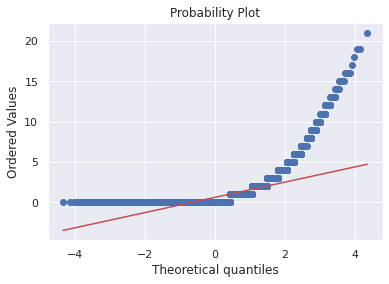

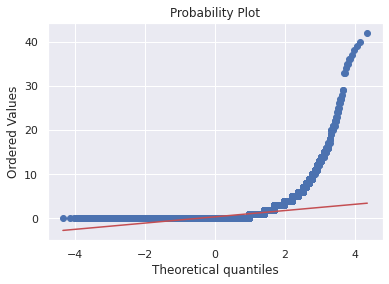

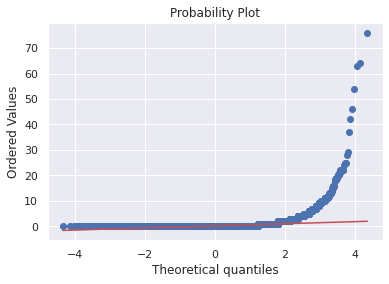

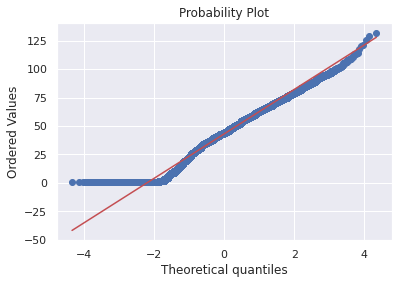

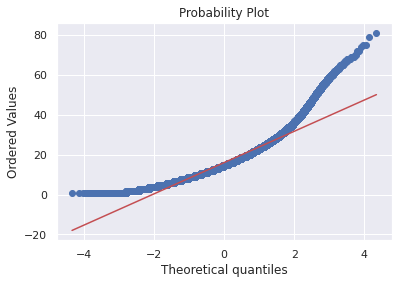

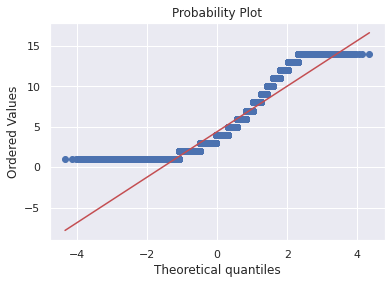

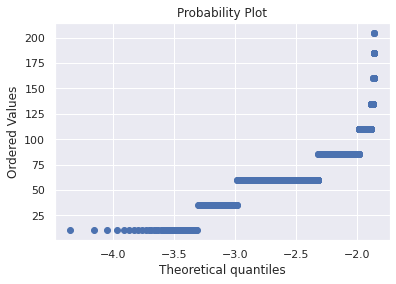

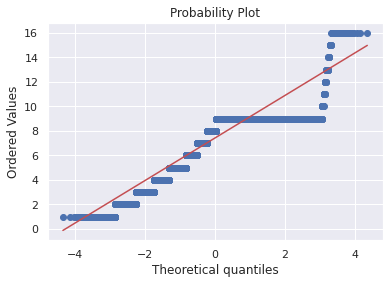

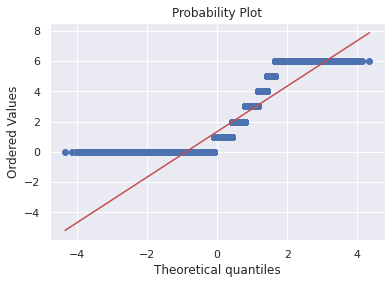

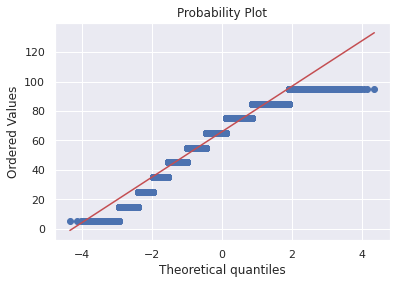

In [ ]:
stats.probplot(df['number_inpatient'], dist="norm", plot=pylab)
pylab.show() 

stats.probplot(df['number_outpatient'], dist="norm", plot=pylab)
pylab.show() 

stats.probplot(df['number_emergency'], dist="norm", plot=pylab)
pylab.show() 

stats.probplot(df['num_lab_procedures'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['num_medications'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['time_in_hospital'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['weight'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['number_diagnoses'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['num_procedures'], dist="norm", plot=pylab)
pylab.show()

stats.probplot(df['age'], dist="norm", plot=pylab)
pylab.show()

In [ ]:
# performing the log transformation for the columns determined to be needing it above.

for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [ ]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [ ]:
df.shape

(101763, 51)

In [ ]:
# get list of only numeric features
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
numerics

['num_lab_procedures',
 'number_outpatient_log1p',
 'time_in_hospital',
 'num_procedures',
 'weight',
 'number_emergency_log1p',
 'number_diagnoses',
 'age',
 'num_medications',
 'number_inpatient_log1p']

In [ ]:
df.dtypes

encounter_id                 object
patient_nbr                  object
race                         object
gender                       object
age                           int64
weight                      float64
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                   

In [ ]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    df[col] = df[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    df[col] = df[col].astype(int)

In [ ]:
# A1Cresult and max_glu_serum
df['A1Cresult'] = df['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
df['max_glu_serum'] = df['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [ ]:
# A1Cresult and max_glu_serum
df['change'] = df['change'].replace(['No','Yes'],[0,1])
df['diabetesMed'] = df['diabetesMed'].replace(['No','Yes'],[0,1])

In [ ]:
# A1Cresult and max_glu_serum
df['change'] = df['change'].replace(['No','Yes'],[0,1])
df['diabetesMed'] = df['diabetesMed'].replace(['No','Yes'],[0,1])

In [ ]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(df, columns=['race','gender'])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

In [ ]:
df.dtypes

encounter_id                 object
patient_nbr                  object
race                         object
gender                       object
age                           int64
weight                      float64
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                   

In [ ]:
df = one_hot_data.copy()
df

,encounter_id,patient_nbr,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,admission_type_id_New Born,admission_type_id_Trauma Center,admission_type_id_nan,discharge_disposition_id_Discharged to Home,discharge_disposition_id_Other,discharge_disposition_id_nan,admission_source_id_Emergency,admission_source_id_Other,admission_source_id_Referral,admission_source_id_nan
0,2278392,8222157,5,NaN,1,NaN,Other,41,0,1,...,0,0,1,0,0,1,0,0,1,0
1,149190,55629189,15,NaN,3,NaN,Other,59,0,18,...,0,0,0,1,0,0,1,0,0,0
2,64410,86047875,25,NaN,2,NaN,Other,11,5,13,...,0,0,0,1,0,0,1,0,0,0
3,500364,82442376,35,NaN,2,NaN,Other,44,1,16,...,0,0,0,1,0,0,1,0,0,0
4,16680,42519267,45,NaN,1,NaN,Other,51,0,8,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,75,NaN,3,MC,Other,51,0,16,...,0,0,0,0,1,0,1,0,0,0
101762,443847782,74694222,85,NaN,5,MC,Other,33,3,18,...,0,0,0,0,1,0,0,1,0,0
101763,443854148,41088789,75,NaN,1,MC,Other,53,0,9,...,0,0,0,1,0,0,1,0,0,0
101764,443857166,31693671,85,NaN,10,MC,Surgery-General,45,2,21,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
df.describe()

,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,metformin,...,admission_type_id_New Born,admission_type_id_Trauma Center,admission_type_id_nan,discharge_disposition_id_Discharged to Home,discharge_disposition_id_Other,discharge_disposition_id_nan,admission_source_id_Emergency,admission_source_id_Other,admission_source_id_Referral,admission_source_id_nan
count,101763.000000,3197.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,65.966854,83.775414,4.396018,43.095909,1.339691,16.021835,7.422649,0.079548,0.285428,0.196407,...,0.000098,0.000206,0.102159,0.723731,0.230280,0.045989,0.564960,0.063618,0.303205,0.068217
std,15.941022,26.066313,2.985092,19.674220,1.705792,8.127589,1.933578,0.356719,0.663593,0.397282,...,0.009913,0.014364,0.302859,0.447154,0.421014,0.209463,0.495765,0.244073,0.459645,0.252120
min,5.000000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,60.000000,2.000000,31.000000,0.000000,10.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,85.000000,4.000000,44.000000,1.000000,15.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,75.000000,110.000000,6.000000,57.000000,2.000000,20.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,95.000000,205.000000,14.000000,132.000000,6.000000,81.000000,16.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 63 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   encounter_id                                 101763 non-null  object 
 1   patient_nbr                                  101763 non-null  object 
 2   age                                          101763 non-null  int64  
 3   weight                                       3197 non-null    float64
 4   time_in_hospital                             101763 non-null  int64  
 5   payer_code                                   61508 non-null   object 
 6   medical_specialty                            101763 non-null  object 
 7   num_lab_procedures                           101763 non-null  int64  
 8   num_procedures                               101763 non-null  int64  
 9   num_medications                              101763 non-nul

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'age', 'weight', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'temp_diag', 'number_inpatient_log1p', 'number_outpatient_log1p',
       'number_emergency_log1p', 'race_AfricanAmerican', 'race_Caucasian',
       'race_Other', 'gender_Female', 'gender_Male',
       'admission_type_id_Elective', 'admission_type_id_

In [ ]:
df1=df[['age','time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide','insulin','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','number_inpatient_log1p', 'number_outpatient_log1p',
       'number_emergency_log1p', 'race_AfricanAmerican', 'race_Caucasian','gender_Female',
       'admission_type_id_Elective', 'admission_type_id_Emergency',
       'admission_type_id_New Born', 'discharge_disposition_id_Discharged to Home',
       'discharge_disposition_id_Other',
       'admission_source_id_Emergency', 'admission_source_id_Other',
       'admission_source_id_Referral','readmitted']]


In [ ]:
X = df1.drop(['readmitted'], axis=1)
y = df1['readmitted']

## Important Features for model

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
max(model.feature_importances_)

[9.27501093e-02 1.06099278e-01 1.44707353e-01 7.20661943e-02
 1.35267371e-01 7.51015591e-02 6.92113595e-03 2.36737214e-02
 1.11417840e-02 3.92861676e-03 2.80320437e-03 4.64663948e-04
 9.43457346e-03 8.99787785e-06 1.36153910e-02 1.28108386e-02
 1.43935209e-04 1.13187296e-02 1.07289276e-02 1.25497061e-03
 2.33022828e-04 2.26278014e-05 2.25936619e-04 1.29171415e-02
 2.53333628e-03 7.10446693e-05 5.51841378e-06 8.57707557e-06
 5.20774570e-06 1.29782449e-02 5.16564387e-03 6.76989532e-02
 3.12142298e-02 2.43055544e-02 1.11334268e-02 1.29052887e-02
 2.72524136e-02 6.19684854e-03 9.73115827e-03 3.93911389e-05
 1.14329720e-02 9.23611684e-03 7.60146051e-03 6.18770400e-03
 6.65682427e-03]


0.14470735346715716

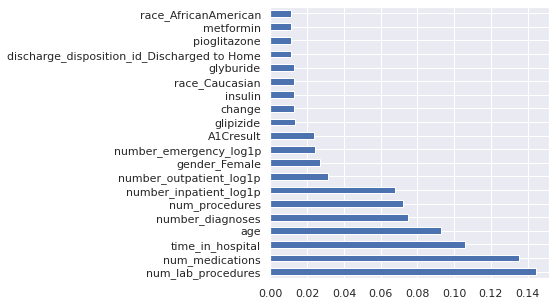

In [ ]:
#plot graph of feature importances for better visualization 
plt.figure(figsize=(5,5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Handling Multicollinearity in Data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X1 =df1[['race_AfricanAmerican','discharge_disposition_id_Discharged to Home',
         'pioglitazone','metformin','insulin','glyburide','change','race_Caucasian','glipizide','A1Cresult','number_emergency_log1p',
         'gender_Female','number_outpatient_log1p','number_inpatient_log1p','num_procedures',
         'number_diagnoses','age','time_in_hospital','num_medications','num_lab_procedures']]
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                        feature        VIF
0                          race_AfricanAmerican   3.139539
1   discharge_disposition_id_Discharged to Home   3.372677
2                                  pioglitazone   1.147489
3                                     metformin   1.503348
4                                       insulin   3.444237
5                                     glyburide   1.266643
6                                        change   3.678052
7                                race_Caucasian  10.242242
8                                     glipizide   1.278272
9                                     A1Cresult   1.310728
10                       number_emergency_log1p   1.238615
11                                gender_Female   2.171940
12                      number_outpatient_log1p   1.235228
13                       number_inpatient_log1p   1.605563
14                               num_procedures   1.987434
15                             number_diagnoses  17.0974

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X1 =df1[['race_AfricanAmerican','discharge_disposition_id_Discharged to Home',
         'pioglitazone','metformin','insulin','glyburide','change','glipizide','A1Cresult','number_emergency_log1p',
         'gender_Female','number_outpatient_log1p','number_inpatient_log1p','num_procedures',
         'number_diagnoses','time_in_hospital','num_medications','num_lab_procedures']]
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]
print(vif_data)

                                        feature       VIF
0                          race_AfricanAmerican  1.251027
1   discharge_disposition_id_Discharged to Home  3.174757
2                                  pioglitazone  1.145531
3                                     metformin  1.494841
4                                       insulin  3.437072
5                                     glyburide  1.242815
6                                        change  3.671516
7                                     glipizide  1.262851
8                                     A1Cresult  1.298505
9                        number_emergency_log1p  1.229182
10                                gender_Female  2.089838
11                      number_outpatient_log1p  1.234625
12                       number_inpatient_log1p  1.602262
13                               num_procedures  1.985624
14                             number_diagnoses  9.653653
15                             time_in_hospital  4.471822
16            

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

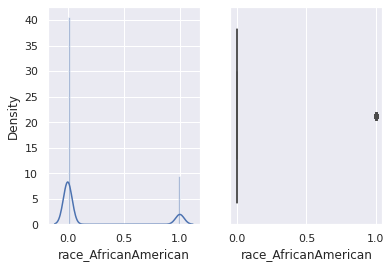

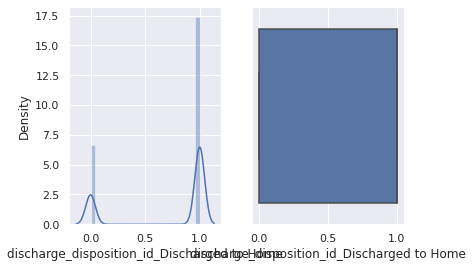

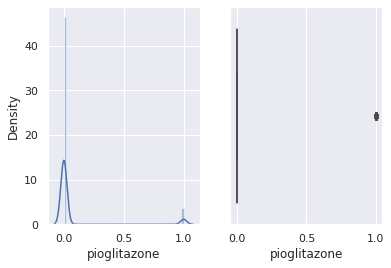

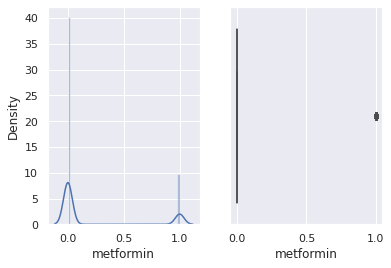

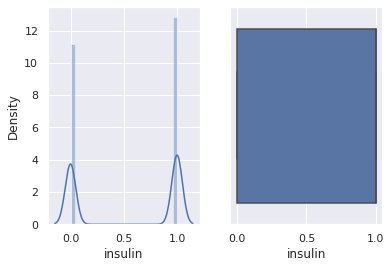

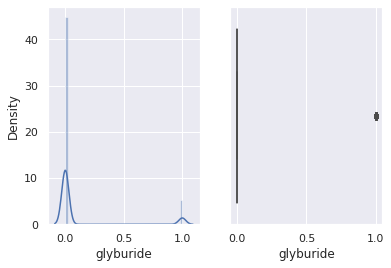

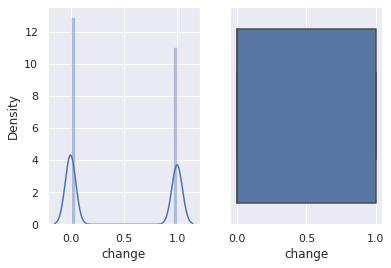

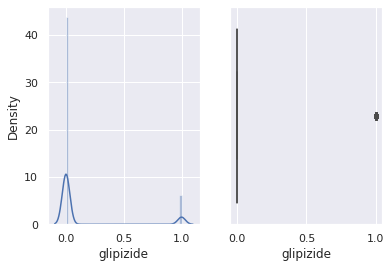

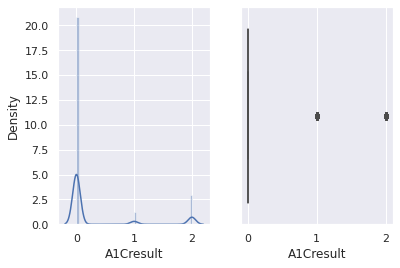

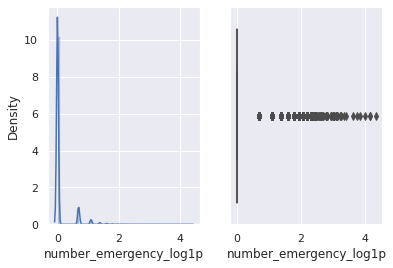

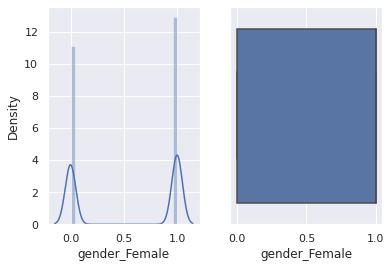

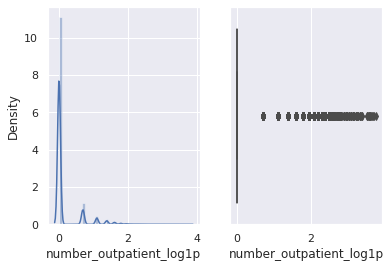

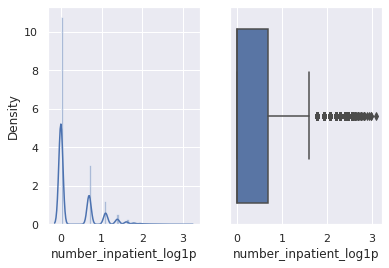

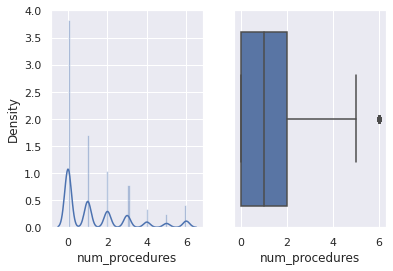

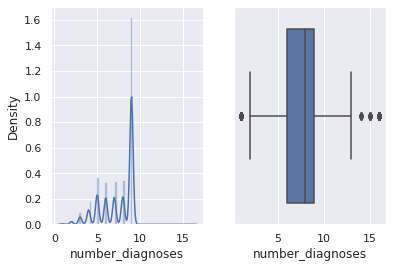

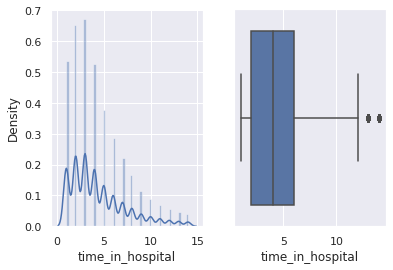

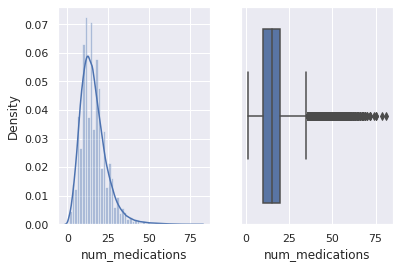

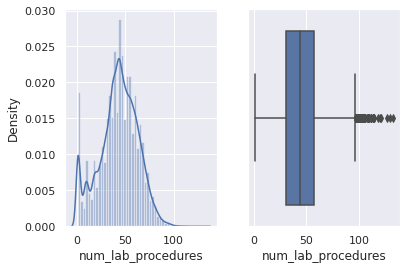

In [ ]:
# Univarient Analysis
for i, col in enumerate(X1.columns):
    plt.figure(i)
    plt.subplot(121)
    sns.distplot(X1[col])

    plt.subplot(122)
    sns.boxplot(X1[col])

## Corelation Matrix to verify feature colinearity

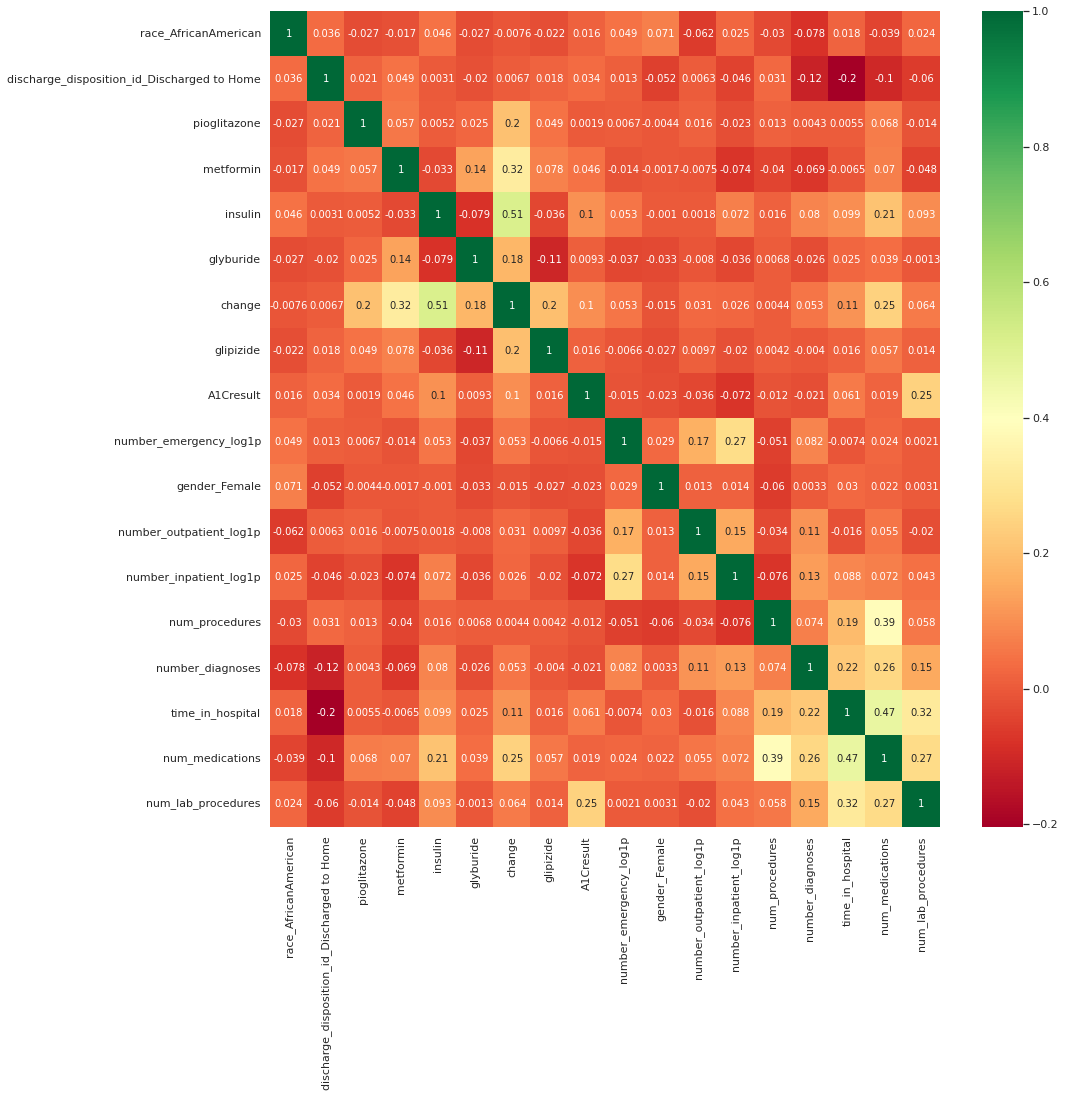

In [ ]:
# corr() -> to find coreeltion between numneric values
corrmat=X1.corr()
top_corr_features=corrmat.index 
plt.figure(figsize=(15,15)) 
#plot heat map 
#heighesst value -> highly corelates
# sighs represent proportinality 
g=sns.heatmap(X1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Splitting of data for model building

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X1,
                                                 df1['readmitted'],
                                                 test_size=0.3,
                                                random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((71234, 18), (30529, 18), (71234,), (30529,))

# HYPERPARAMETER TUNING WITH OPTUNA

## Random Forest

In [ ]:

import sklearn
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
 
    max_depth = trial.suggest_int("rf_max_depth", 2, 64, log=True)
    n_estimators = trial.suggest_int("n_estimators", 50, 400)
    max_samples = trial.suggest_float("rf_max_samples", 0.2, 1)
   
    rf_model = RandomForestClassifier(
        max_depth = max_depth,
        max_samples = max_samples,
        n_estimators =n_estimators,
        random_state = 42)
    score = cross_val_score(rf_model, X_train, y_train,  cv=5).mean()
    return score

In [ ]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-04-23 16:48:41,676] A new study created in memory with name: no-name-0907f0ae-4434-42bf-95d2-cef1e7719211
[I 2022-04-23 16:48:57,922] Trial 0 finished with value: 0.6224414988991922 and parameters: {'rf_max_depth': 6, 'n_estimators': 195, 'rf_max_samples': 0.4592259970637946}. Best is trial 0 with value: 0.6224414988991922.
[I 2022-04-23 16:49:04,959] Trial 1 finished with value: 0.6096667082210875 and parameters: {'rf_max_depth': 2, 'n_estimators': 111, 'rf_max_samples': 0.698132254183748}. Best is trial 0 with value: 0.6224414988991922.
[I 2022-04-23 16:49:18,066] Trial 2 finished with value: 0.6113793750993592 and parameters: {'rf_max_depth': 50, 'n_estimators': 93, 'rf_max_samples': 0.20180094418131864}. Best is trial 0 with value: 0.6224414988991922.
[I 2022-04-23 16:50:27,155] Trial 3 finished with value: 0.6241681919957317 and parameters: {'rf_max_depth': 10, 'n_estimators': 364, 'rf_max_samples': 0.8315239701981905}. Best is trial 3 with value: 0.6241681919957317.
[I 20

Best Score:  0.625136845546081
Best Params: 
  rf_max_depth: 12
  n_estimators: 364
  rf_max_samples: 0.27780099800116986


In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import NuSVC
from sklearn.feature_selection import RFE

In [ ]:

def objective(trial):
    penalty= trial.suggest_categorical("penalty",['l1','l2','elasticnet'])
    solver= trial.suggest_categorical("solver",['newton-cg', 'lbfgs', 'liblinear'])
    C = trial.suggest_float("C", 0, 4, step=0.2)
    max_iter = trial.suggest_int("max_iter", 200, 800)
  
   
    lgr = LogisticRegression(
        max_iter = max_iter,
        C = C,
        solver = solver,
        penalty=penalty,
        random_state = 42)
    score = cross_val_score(lgr, X_train, y_train,  cv=5).mean()
    return score


In [ ]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-04-23 18:01:18,339] A new study created in memory with name: no-name-f465757f-730c-4178-b953-253459b7aa26
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-pa

Best Score:  0.6205042174189568
Best Params: 
  penalty: l2
  solver: lbfgs
  C: 0.6000000000000001
  max_iter: 690


In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def objective(trial):
    algorithm= trial.suggest_categorical("algorithm",['auto', 'ball_tree', 'kd_tree', 'brute'])
    n_neighbors = trial.suggest_int("n_neighbors", 2, 7)
    p = trial.suggest_int("p", 1,2)
  
   
    knn = KNeighborsClassifier(
        algorithm = algorithm,
        n_neighbors = n_neighbors,
        p = p)
    score = cross_val_score(knn, X_train, y_train,  cv=5).mean()
    return score


#,random_state = 42

In [ ]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-04-23 21:01:25,432] A new study created in memory with name: no-name-b419f0f0-c41b-42c4-84a8-f603b57b2f03
[I 2022-04-23 21:02:12,203] Trial 0 finished with value: 0.5425358884306078 and parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}. Best is trial 0 with value: 0.5425358884306078.
[I 2022-04-23 21:02:23,760] Trial 1 finished with value: 0.5543560547328381 and parameters: {'algorithm': 'kd_tree', 'n_neighbors': 4, 'p': 1}. Best is trial 1 with value: 0.5543560547328381.
[I 2022-04-23 21:03:10,013] Trial 2 finished with value: 0.5425358884306078 and parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}. Best is trial 1 with value: 0.5543560547328381.
[I 2022-04-23 21:03:30,066] Trial 3 finished with value: 0.5570093010460707 and parameters: {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 2}. Best is trial 3 with value: 0.5570093010460707.
[I 2022-04-23 21:04:31,549] Trial 4 finished with value: 0.5445994856928484 and parameters: {'algorithm': 'auto', 'n_neigh

Best Score:  0.5587641086594989
Best Params: 
  algorithm: brute
  n_neighbors: 7
  p: 1


In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## GradientBoostingClassifier

In [ ]:
def objective(trial):
    subsample = trial.suggest_discrete_uniform("subsample", 0.1, 1.0, 0.1)
    n_estimators = trial.suggest_int("n_estimators", 50, 400)
    max_depth = trial.suggest_int("max_depth", 2, 64, log=True)

  
   
    gbc = GradientBoostingClassifier(
        subsample = subsample,
        n_estimators = n_estimators,
        max_depth=max_depth,
        random_state = 42)
    score = cross_val_score(gbc, X_train, y_train,  cv=5).mean()
    return score


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-04-24 15:05:13,071] A new study created in memory with name: no-name-04c77511-bf69-42ea-b399-8a49f6411af1
[I 2022-04-24 15:06:31,705] Trial 0 finished with value: 0.6253333377479363 and parameters: {'subsample': 0.6, 'n_estimators': 382, 'max_depth': 2}. Best is trial 0 with value: 0.6253333377479363.
[I 2022-04-24 15:07:08,258] Trial 1 finished with value: 0.6247577907911994 and parameters: {'subsample': 0.8, 'n_estimators': 171, 'max_depth': 2}. Best is trial 0 with value: 0.6253333377479363.
[I 2022-04-24 15:07:47,976] Trial 2 finished with value: 0.6252491016061359 and parameters: {'subsample': 0.6, 'n_estimators': 159, 'max_depth': 3}. Best is trial 0 with value: 0.6253333377479363.
[I 2022-04-24 15:22:26,680] Trial 3 finished with value: 0.5902518403843953 and parameters: {'subsample': 0.5, 'n_estimators': 111, 'max_depth': 25}. Best is trial 0 with value: 0.6253333377479363.
[I 2022-04-24 15:23:50,394] Trial 4 finished with value: 0.6255579789557653 and parameters: {'sub

KeyboardInterrupt: ignored

In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## SGD Classifier

In [ ]:
import optuna
from optuna.pruners import SuccessiveHalvingPruner
from optuna.samplers import TPESampler
from sklearn.linear_model import SGDClassifier
def objective(trial):
    # Prompting Optuna to suggest a hyperparameter value
    alpha = trial.suggest_float("alpha", 1e-5, 1e-1, log=True)
    sgd = SGDClassifier(alpha = alpha, random_state = 42)
    # Report the intermediate score for every step
    for step in range(100):
        sgd.partial_fit(X_train, y_train, classes=df1['readmitted'])
        # Report the intermediate objective value.
        intermediate_value = sgd.score(X_test, y_test)
        trial.report(intermediate_value, step)
        # Prune the intermediate value if neccessary.
        if trial.should_prune():
            raise optuna.TrialPruned()
    return sgd.score(X_test, y_test)

In [ ]:
study = optuna.create_study(sampler = TPESampler(), 
                            pruner = SuccessiveHalvingPruner(),
                            direction= "maximize")
study.optimize(objective, n_trials = 20)
pruned_trials = study.get_trials(states=[optuna.trial.TrialState.PRUNED])
complete_trials = study.get_trials(states=[optuna.trial.TrialState.COMPLETE])
print("# Pruned trials: ", len(pruned_trials))
print("# Complete trials: ", len(complete_trials))
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-04-22 20:23:08,421] A new study created in memory with name: no-name-dc2354d2-6c2c-41a8-90e4-54ee702121bd
[I 2022-04-22 20:23:12,796] Trial 0 finished with value: 0.619050738641947 and parameters: {'alpha': 0.0060262995404721355}. Best is trial 0 with value: 0.619050738641947.
[I 2022-04-22 20:23:17,209] Trial 1 finished with value: 0.6218349765796456 and parameters: {'alpha': 0.0005512180429874457}. Best is trial 1 with value: 0.6218349765796456.
[I 2022-04-22 20:23:17,303] Trial 2 pruned. 
[I 2022-04-22 20:23:21,675] Trial 3 finished with value: 0.6184938910544073 and parameters: {'alpha': 0.009886843715140679}. Best is trial 1 with value: 0.6218349765796456.
[I 2022-04-22 20:23:21,759] Trial 4 pruned. 
[I 2022-04-22 20:23:21,847] Trial 5 pruned. 
[I 2022-04-22 20:23:26,168] Trial 6 finished with value: 0.6188869599397294 and parameters: {'alpha': 0.011037658111942858}. Best is trial 1 with value: 0.6218349765796456.
[I 2022-04-22 20:23:26,257] Trial 7 pruned. 
[I 2022-04-22 

# Pruned trials:  16
# Complete trials:  4
Best Score:  0.6218349765796456
Best Params: 
  alpha: 0.0005512180429874457


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_intermediate_values(study)

## ANN

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier

import optuna

X_train,X_test,y_train,y_test = train_test_split(X1,
                                                 df1['readmitted'],
                                                 test_size=0.3,
                                                random_state=42)
def objective(trial):

    solver=trial.suggest_categorical('solver', ['sgd', 'adam','lbfgs'])
    trial.set_user_attr("BATCHSIZE", 128)
    momentum = trial.suggest_uniform("momentum", 0, 1.0)
    learning_rate_init = trial.suggest_float(
        "learning_rate_init", 1e-5, 1e-3, log=True
    )
    clf = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        batch_size=trial.user_attrs["BATCHSIZE"],
        momentum=momentum,
        solver=solver,
        random_state=0,
        learning_rate_init=learning_rate_init
    )
    clf.fit(X_train, y_train)

    return clf.score(X_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=3)
assert "BATCHSIZE" in study.best_trial.user_attrs.keys()
assert study.best_trial.user_attrs["BATCHSIZE"] == 128

[I 2022-04-30 15:06:45,431] A new study created in memory with name: no-name-7805b9bb-5c91-48eb-ba61-2c1a1329f262
[I 2022-04-30 15:08:02,678] Trial 0 finished with value: 0.6245537030364572 and parameters: {'solver': 'sgd', 'momentum': 0.00345874683848435, 'learning_rate_init': 0.000694244590229268}. Best is trial 0 with value: 0.6245537030364572.
[I 2022-04-30 15:09:19,318] Trial 1 finished with value: 0.6248812604408923 and parameters: {'solver': 'sgd', 'momentum': 0.6080001742644457, 'learning_rate_init': 0.0003895017829360243}. Best is trial 1 with value: 0.6248812604408923.
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[I 202

In [ ]:
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

Best Score:  0.6248812604408923
Best Params: 
  solver: sgd
  momentum: 0.6080001742644457
  learning_rate_init: 0.0003895017829360243


In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

## Adaboost

In [ ]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier
def objective(trial):
 
    n_estimators = trial.suggest_int("n_estimators", 50, 400)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
   
    adb_model = AdaBoostClassifier(
        learning_rate=learning_rate,
        n_estimators =n_estimators,
        random_state = 42)
    score = cross_val_score(adb_model, X_train, y_train,  cv=5).mean()
    return score

In [ ]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective, n_trials = 50)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[I 2022-05-01 15:15:10,223] A new study created in memory with name: no-name-8da59c10-195e-4c58-8ab5-9b9f23ef3dfe
[I 2022-05-01 15:15:52,213] Trial 0 finished with value: 0.6130359154257075 and parameters: {'n_estimators': 184, 'learning_rate': 0.000427807856356728}. Best is trial 0 with value: 0.6130359154257075.
[I 2022-05-01 15:16:45,039] Trial 1 finished with value: 0.6130359154257075 and parameters: {'n_estimators': 266, 'learning_rate': 0.00022308984012703014}. Best is trial 0 with value: 0.6130359154257075.
[I 2022-05-01 15:18:03,956] Trial 2 finished with value: 0.6130359154257075 and parameters: {'n_estimators': 385, 'learning_rate': 1.2812559553319932e-05}. Best is trial 0 with value: 0.6130359154257075.
[I 2022-05-01 15:18:35,248] Trial 3 finished with value: 0.6130359154257075 and parameters: {'n_estimators': 157, 'learning_rate': 3.8816733354417024e-05}. Best is trial 0 with value: 0.6130359154257075.
[I 2022-05-01 15:19:34,477] Trial 4 finished with value: 0.6130359154257

Best Score:  0.6130359154257075
Best Params: 
  n_estimators: 184
  learning_rate: 0.000427807856356728


In [ ]:
optuna.visualization.plot_contour(study)

In [ ]:
optuna.visualization.plot_param_importances(study)